In [1]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import cv2

In [2]:
images = [] # liste pour stocker toutes les images
labels = [] # liste pour stocker les labels de chaque image

dataset_directory = "images"

for breed in os.listdir(dataset_directory):
    breed_directory = os.path.join(dataset_directory, breed)
    if os.path.isdir(breed_directory):
        for image_filename in os.listdir(breed_directory):
            img = cv2.imread(os.path.join(breed_directory, image_filename))
            if img is not None:
                images.append(img)
                labels.append(breed)

In [3]:
len(images)

1919

In [4]:
labels = np.array(labels)
class_names = np.unique(labels)
class_names

array(['Afghan_hound', 'Blenheim_spaniel', 'Chihuahua',
       'Japanese_spaniel', 'Maltese_dog', 'Pekinese',
       'Rhodesian_ridgeback', 'Shih', 'papillon', 'toy_terrier'],
      dtype='<U19')

In [5]:
#Redimensionnement des images

image_size = (224, 224) # Vous pouvez choisir une autre taille

images = [cv2.resize(img, image_size) for img in images]

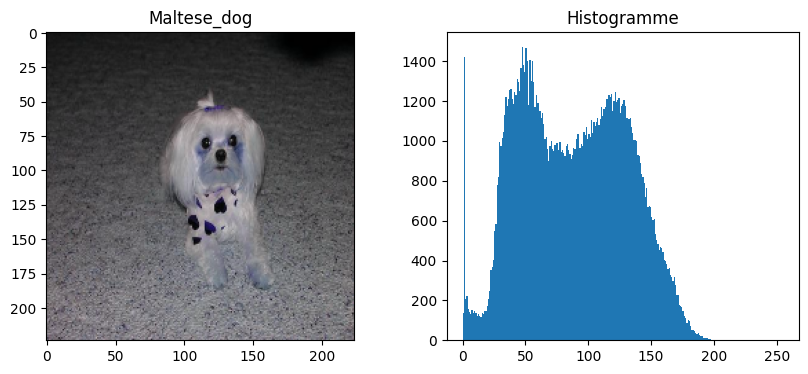

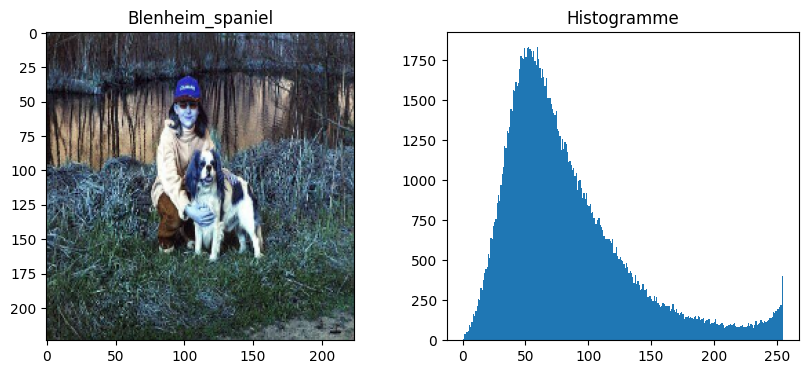

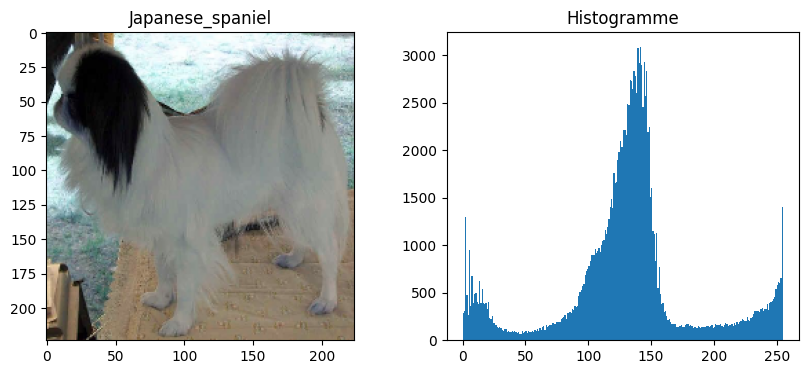

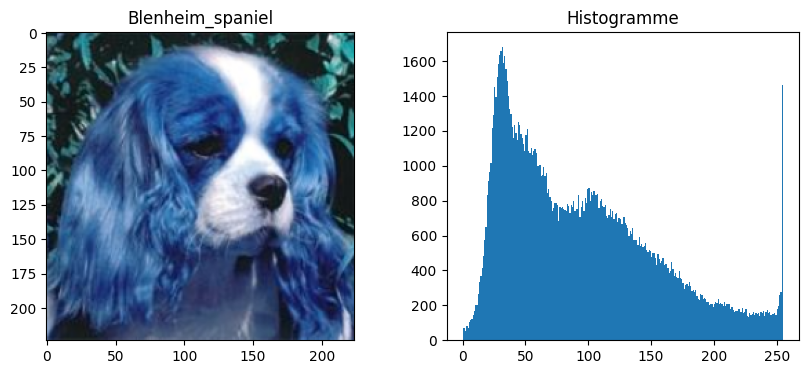

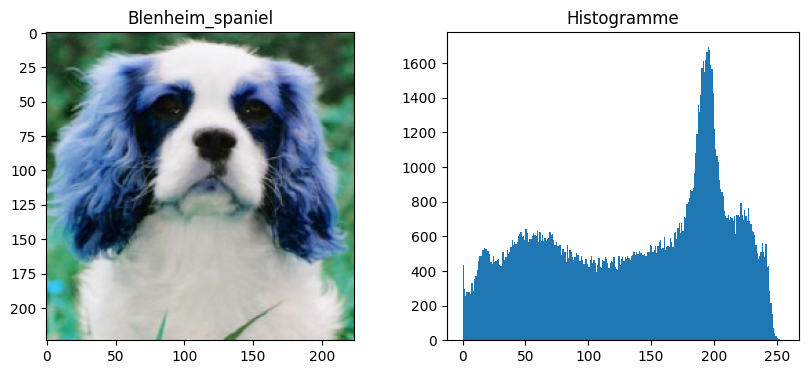

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# Choisis un index au hasard dans le jeu de données
index = np.random.choice(np.arange(len(images)), size=5, replace=False)

# Affiche les images et leurs histogrammes correspondants
for i in index:
    img = images[i]
    label = labels[i]

    plt.figure(figsize=(10, 4))
    
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title(label)
    
    plt.subplot(1, 2, 2)
    n, bins, patches = plt.hist(img.flatten(), bins=range(256))
    plt.title('Histogramme')
    
    plt.show()

In [7]:
#Normalisation des images

for i in range(len(images)):
    images[i] = images[i] / 255.0

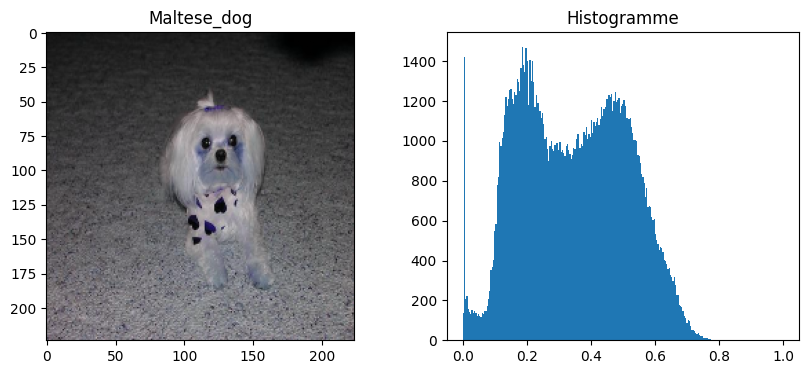

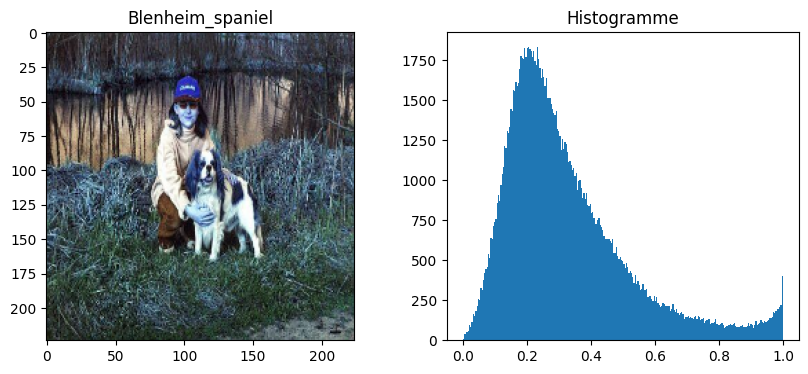

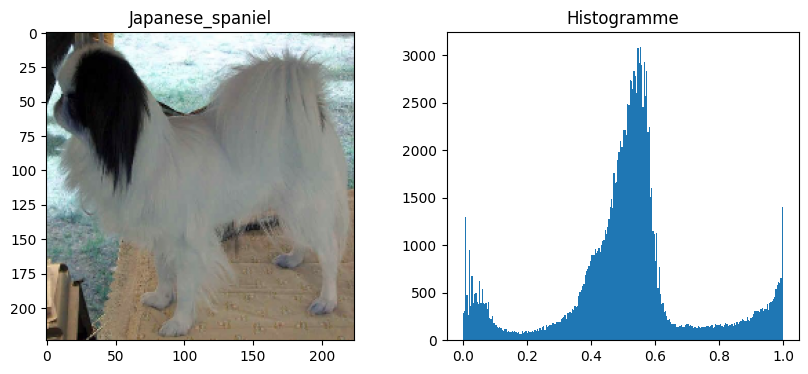

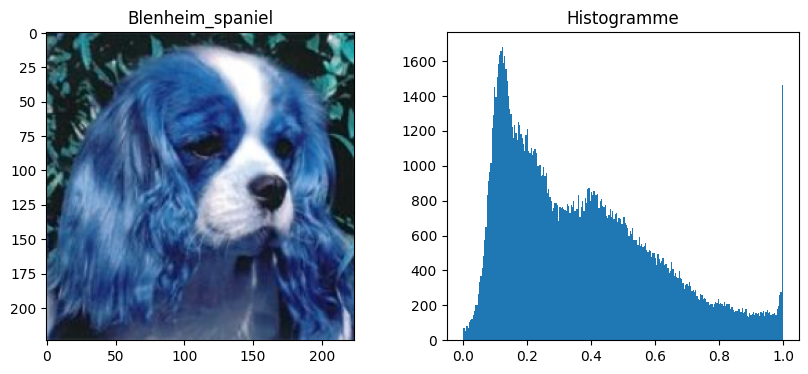

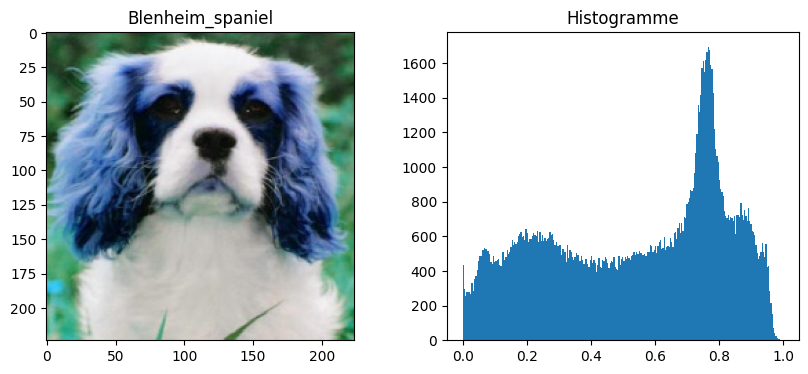

In [8]:
def display_images_and_histograms(images, labels, indices):
    """
    Affiche les images et leurs histogrammes correspondants.

    Parameters:
    - images : une liste d'images.
    - labels : une liste de labels correspondant aux images.
    - indices : une liste d'indices des images à afficher.
    """

    for i in indices:
        img = images[i]
        label = labels[i]

        plt.figure(figsize=(10, 4))

        plt.subplot(1, 2, 1)
        plt.imshow(img)
        plt.title(label)

        plt.subplot(1, 2, 2)
        n, bins, patches = plt.hist(img.flatten(), bins=np.linspace(0, 1, 256))
        plt.title('Histogramme')

        plt.show()

display_images_and_histograms(images, labels, index)

In [9]:
from PIL import Image, ImageOps

def apply_autocontrast(image):
    """
    Applique l'autocontraste à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec autocontraste appliqué.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'autocontraste
    autocontrasted_image = ImageOps.autocontrast(pil_image)

    # Convertir l'image PIL en tableau numpy
    autocontrasted_image = np.array(autocontrasted_image) / 255.0

    return autocontrasted_image

# Appliquer l'autocontraste à toutes les images
images = [apply_autocontrast(img) for img in images]


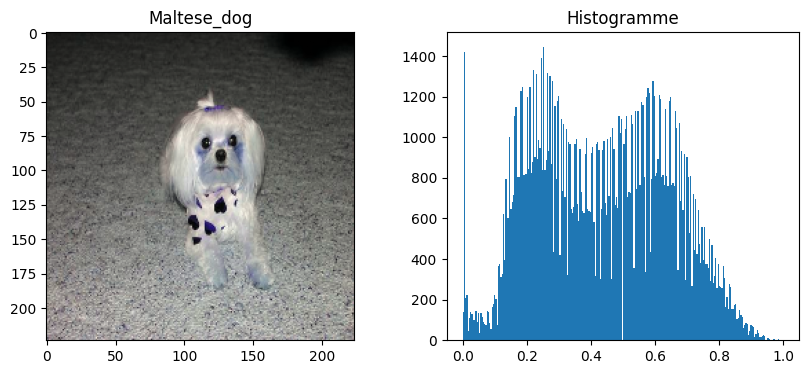

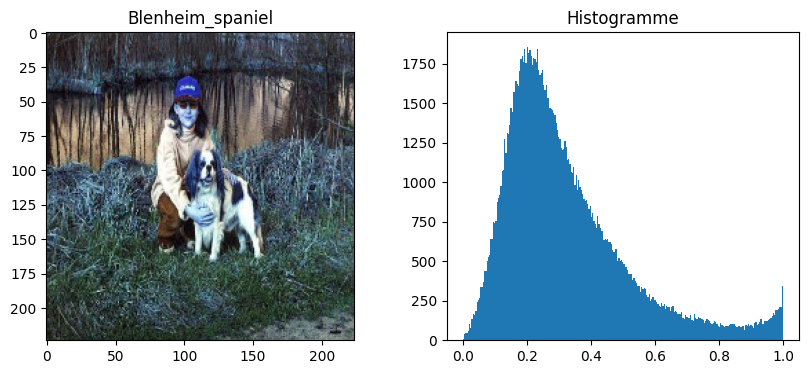

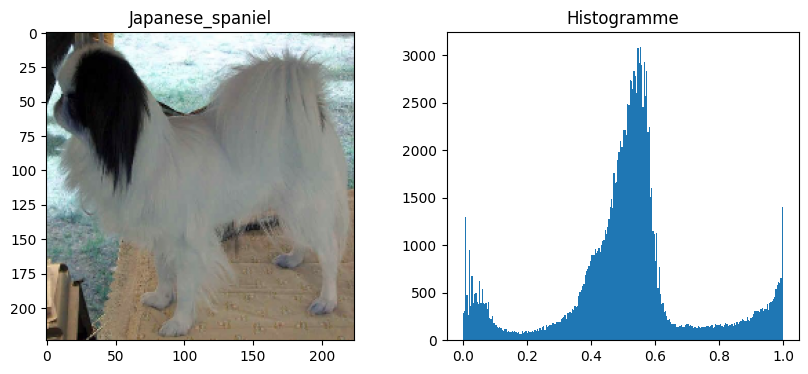

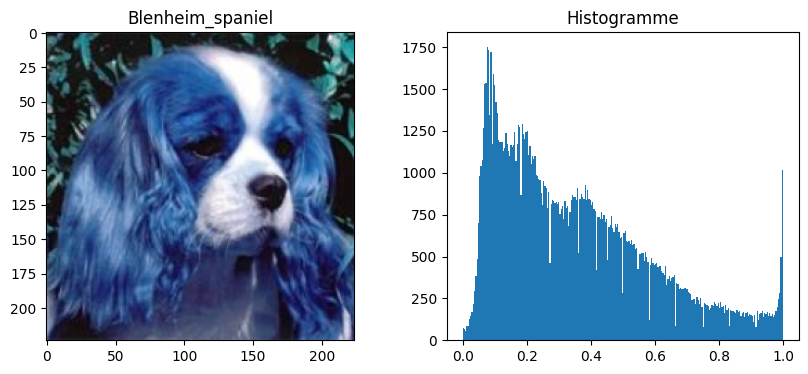

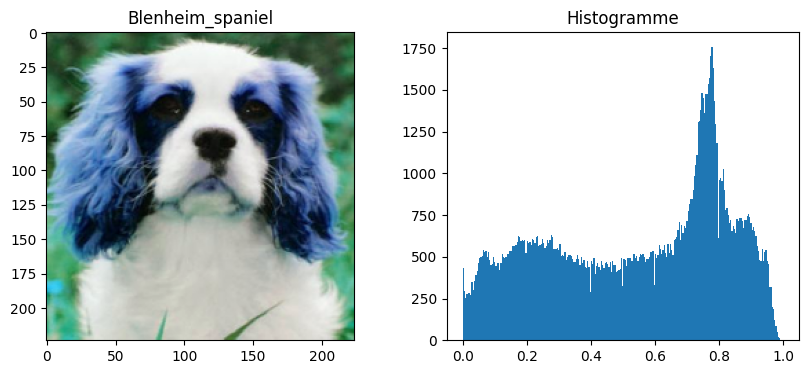

In [10]:
display_images_and_histograms(images, labels, index)

In [11]:
def apply_equalization(image):
    """
    Applique l'égalisation d'histogramme à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec égalisation d'histogramme appliquée.
    """

    # Convertir l'image en une image PIL
    pil_image = Image.fromarray((image * 255).astype(np.uint8))

    # Appliquer l'égalisation d'histogramme
    equalized_image = ImageOps.equalize(pil_image)

    # Convertir l'image PIL en tableau numpy
    equalized_image = np.array(equalized_image) / 255.0

    return equalized_image

# Appliquer l'égalisation d'histogramme à toutes les images
images = [apply_equalization(img) for img in images]

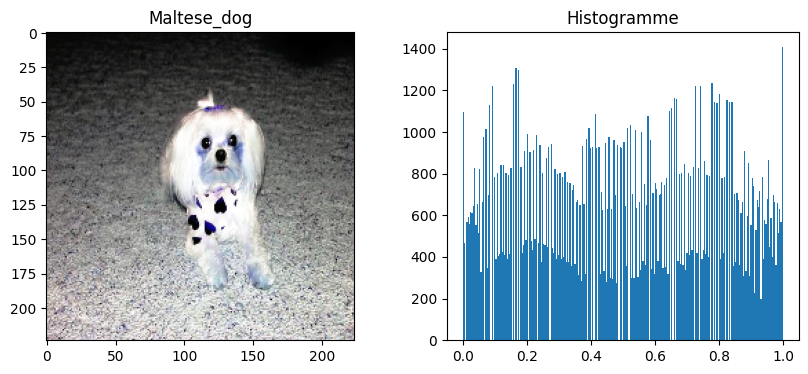

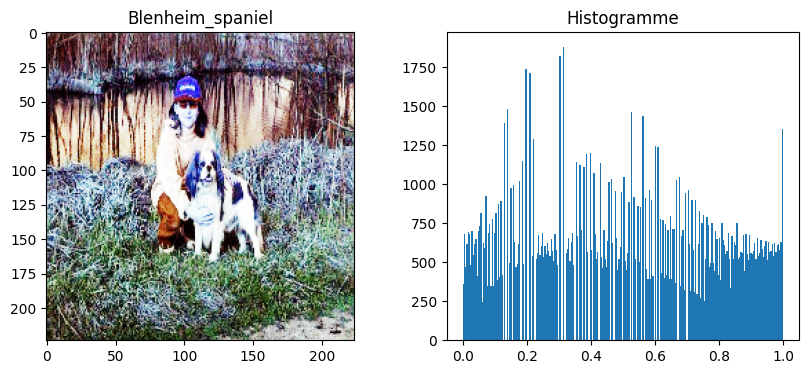

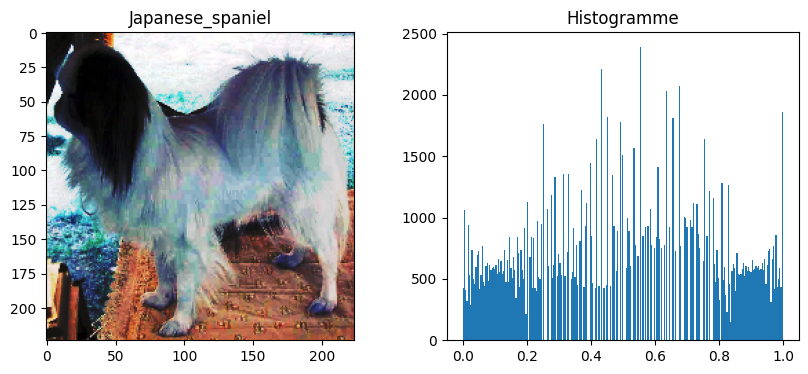

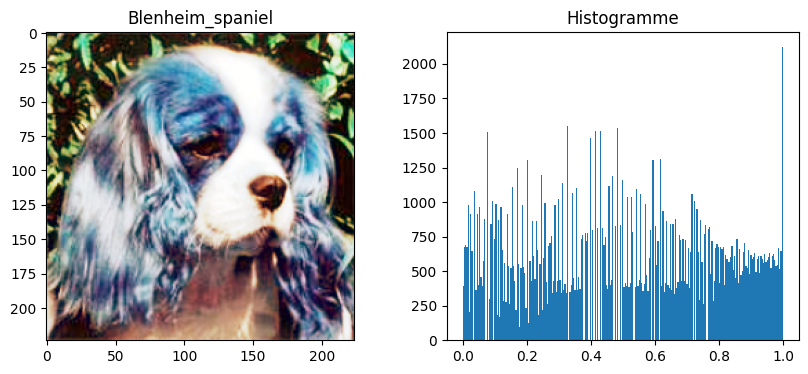

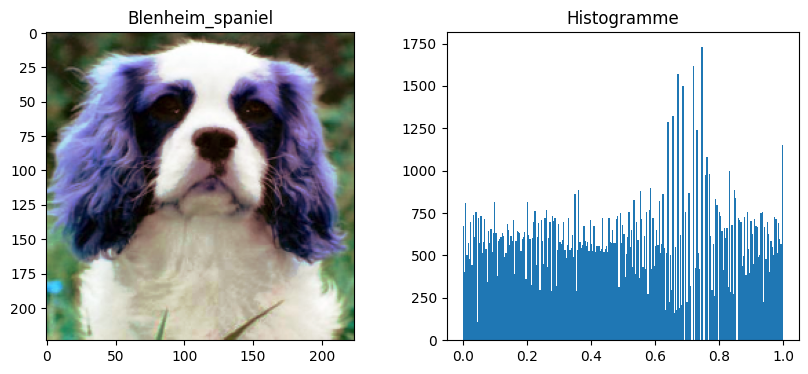

In [12]:
display_images_and_histograms(images, labels, index)

In [13]:
from skimage.restoration import denoise_nl_means
from skimage import img_as_float

def apply_nl_means_denoising(image):
    """
    Applique le débruitage NL-means à une image.

    Parameters:
    - image : une image PIL.

    Returns:
    - une image PIL avec le débruitage NL-means appliqué.
    """

    # Convertir l'image en format float
    image_float = img_as_float(image)

    # Appliquer le débruitage NL-means
    denoised_image = denoise_nl_means(image_float, h=0.08, fast_mode=True, 
                                      patch_size=5, patch_distance=3, channel_axis=-1)

    return denoised_image

# Appliquer le débruitage NL-means à toutes les images
images = [apply_nl_means_denoising(img) for img in images]


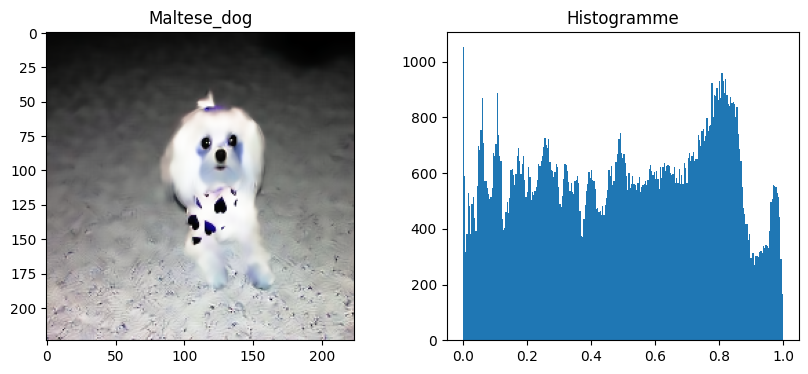

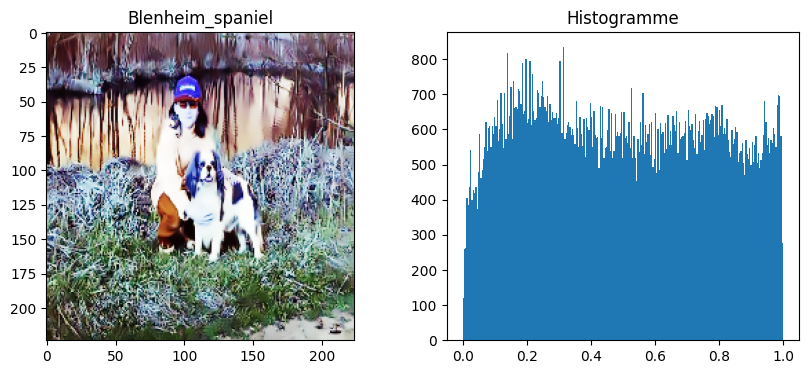

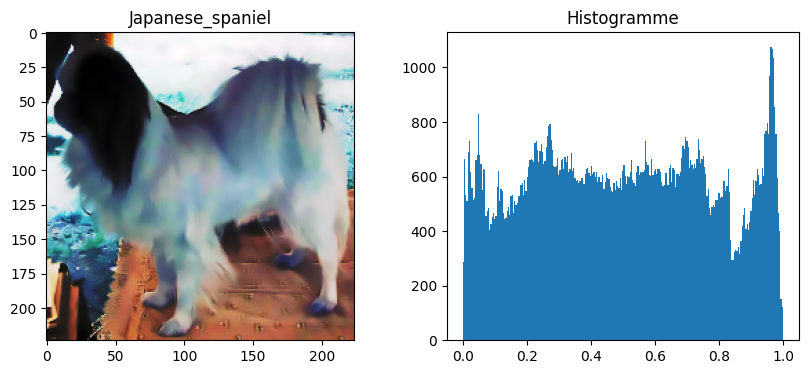

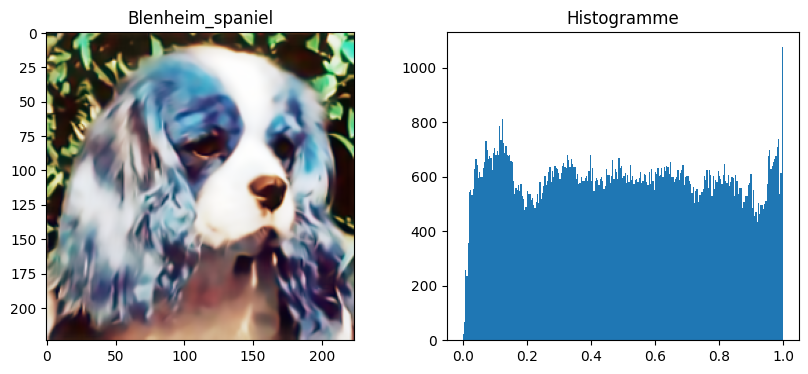

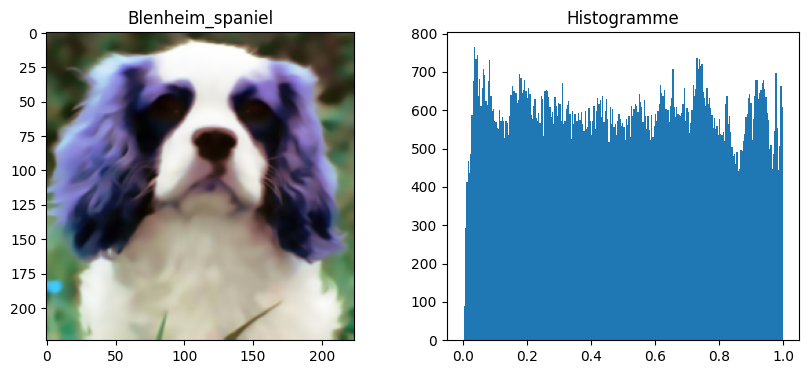

In [14]:
display_images_and_histograms(images, labels, index)

In [15]:
def apply_cropping(image):
    """
    Applique un recadrage au centre de l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image recadrée.
    """
    width, height, _ = image.shape
    new_width = new_height = min(width, height)
    left = int((width - new_width)/2)
    top = int((height - new_height)/2)
    right = int((width + new_width)/2)
    bottom = int((height + new_height)/2)

    image = image[left:right, top:bottom]
    return image

def apply_mirror(image):
    """
    Applique une symétrie à l'image.

    Parameters:
    - image : un tableau numpy représentant l'image.

    Returns:
    - un tableau numpy représentant l'image symétrisée.
    """
    return np.flip(image, axis=1)

# Appliquer le recadrage et le mirroring à toutes les images
images = [apply_cropping(img) for img in images]

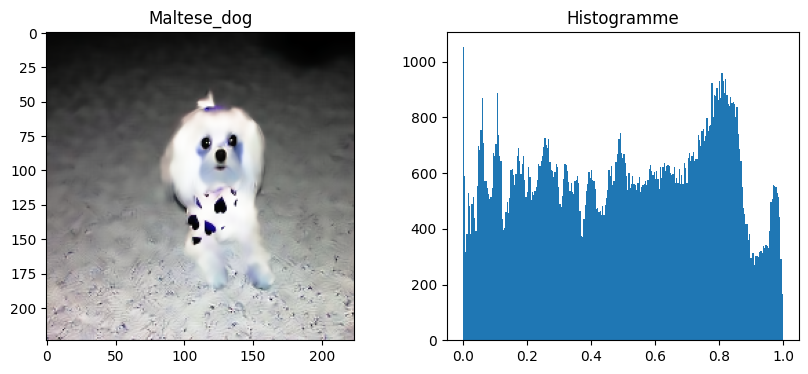

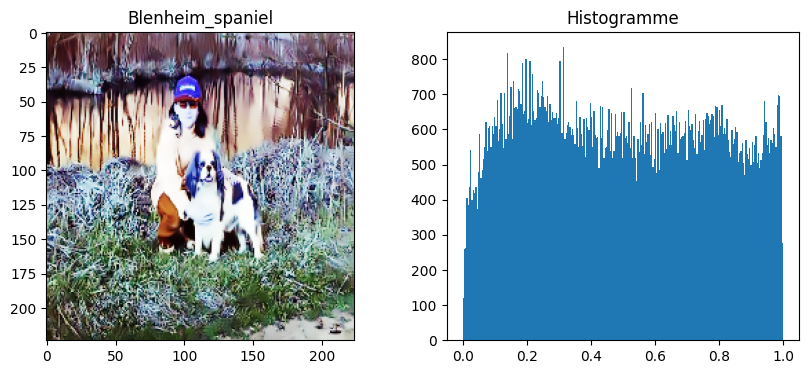

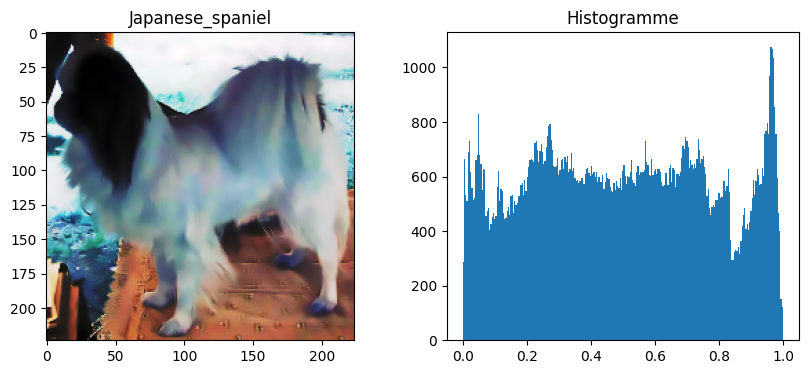

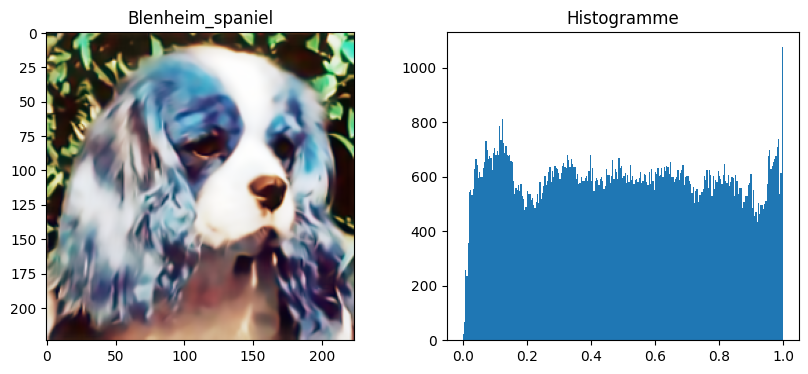

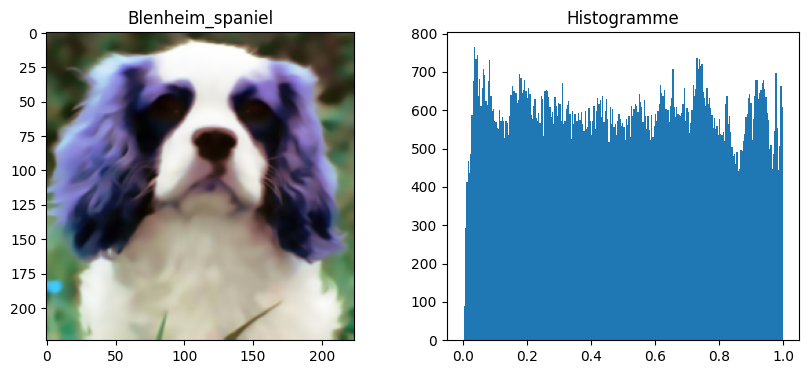

In [16]:
display_images_and_histograms(images, labels, index)

In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Créer un générateur d'images augmentées
datagen = ImageDataGenerator(
    rotation_range=20,      # plage de degrés pour les rotations aléatoires
    width_shift_range=0.1,  # plage de décalage aléatoire en largeur, en fractions de la largeur totale
    height_shift_range=0.1, # plage de décalage aléatoire en hauteur, en fractions de la hauteur totale
    shear_range=0.1,        # plage de cisaillement aléatoire
    zoom_range=0.1,         # plage de zoom aléatoire
    horizontal_flip=True,   # active le retournement horizontal aléatoire
    fill_mode='nearest'     # mode de remplissage pour les pixels hors des frontières d'entrée
)

# Convertir les listes d'images et de labels en arrays numpy pour l'entraînement
images = np.array(images)
labels = np.array(labels)

# Ajuster le générateur de données sur vos données
datagen.fit(images)

2023-06-02 08:04:10.426447: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-06-02 08:04:10.472336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 08:04:10.653038: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-02 08:04:10.653715: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-02 08:04:11.247836: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not fin

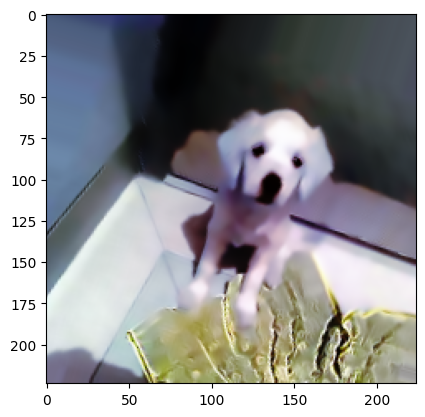

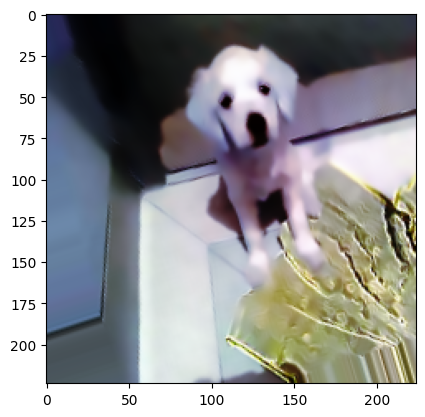

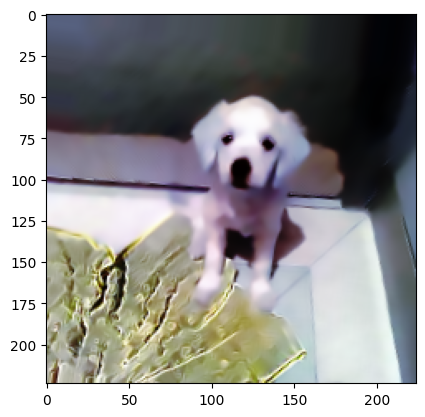

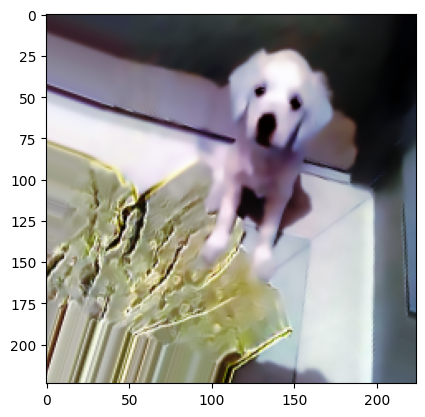

In [18]:
# Choisis une image à augmenter
image_to_augment = images[23]

# Redimensionne l'image pour ajouter une quatrième dimension (la dimension du lot)
image_to_augment = image_to_augment.reshape((1,) + image_to_augment.shape)

# Prépare un lot d'augmentations (ici, 4 augmentations)
i = 0
for batch in datagen.flow(image_to_augment, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(batch[0])
    i += 1
    if i % 4 == 0: # limiter à 4 images
        break

plt.show()

In [19]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Encodage des labels en entiers puis en catégories one-hot
le = LabelEncoder()
labels_integer = le.fit_transform(labels)
labels_categorical = to_categorical(labels_integer)

In [20]:
from sklearn.model_selection import train_test_split

# Séparation du jeu de données
X_train, X_test, y_train, y_test = train_test_split(images, labels_categorical, test_size=0.2, random_state=42)

In [21]:
# Appliquer le générateur de données sur l'ensemble d'entraînement
train_datagen = datagen.flow(X_train, y_train, batch_size=32)

# Pour l'ensemble de validation, il est préférable de ne pas faire de data augmentation
val_datagen = ImageDataGenerator().flow(X_test, y_test, batch_size=32)

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

num_classes = len(np.unique(labels)) # Compte le nombre unique de classes/races de chiens

model_vgg = Sequential()

# Bloc 1
model_vgg.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(224, 224, 3)))
model_vgg.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 2
model_vgg.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 3
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 4
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc 5
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(Conv2D(512, (3, 3), padding='same', activation='relu'))
model_vgg.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

# Bloc entièrement connecté
model_vgg.add(Flatten())
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(4096, activation='relu'))
model_vgg.add(Dropout(0.5))
model_vgg.add(Dense(num_classes, activation='softmax')) # Couche de sortie

# Compiler le modèle
model_vgg.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


2023-06-02 08:04:13.926836: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:996] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-06-02 08:04:13.990943: W tensorflow/core/common_runtime/gpu/gpu_device.cc:1956] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [23]:
"""# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraînement du modèle
history_vgg = model_vgg.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs
)"""

"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraînement du modèle\nhistory_vgg = model_vgg.fit(\n    train_datagen,\n    validation_data=val_datagen,\n    steps_per_epoch=len(X_train) // batch_size,\n    validation_steps=len(X_test) // batch_size,\n    epochs=epochs\n)"

In [24]:
"""import pickle

# Enregistrer l'objet history
with open('models/history_vgg.pkl', 'wb') as f:
    pickle.dump(history_vgg, f)"""


"import pickle\n\n# Enregistrer l'objet history\nwith open('models/history_vgg.pkl', 'wb') as f:\n    pickle.dump(history_vgg, f)"

In [25]:
import pickle

# Charger l'objet history
history_vgg = pickle.load(open('models/history_vgg.pkl', 'rb'))

EOFError: Ran out of input

In [ ]:
score = model_vgg.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.2992911338806152
Test accuracy: 0.125


In [27]:
import matplotlib.pyplot as plt

def plot_loss_accuracy(history):
      # Visualiser la précision et la perte pendant l'entraînement
      plt.figure(figsize=[6,4])
      plt.plot(history.history['loss'], 'black', linewidth=2.0)
      plt.plot(history.history['val_loss'], 'blue', linewidth=2.0)
      plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
      plt.xlabel('Epochs', fontsize=10)
      plt.ylabel('Loss', fontsize=10)
      plt.title('Loss Curves', fontsize=12)

      plt.figure(figsize=[6,4])
      plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
      plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
      plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
      plt.xlabel('Epochs', fontsize=10)
      plt.ylabel('Accuracy', fontsize=10)
      plt.title('Accuracy Curves', fontsize=12)

In [ ]:
plot_loss_accuracy(history_vgg)

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

def print_perf(model):
  # Prédictions sur les données de test
  y_pred = model.predict(X_test)

  # Convertir les probabilités des classes en prédictions de classes
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_true = np.argmax(y_test, axis=1)

  # Obtenir le rapport de classification
  report = classification_report(y_true, y_pred_classes, target_names=class_names)

  print(report)

  # Générer la matrice de confusion
  cm = confusion_matrix(y_true, y_pred_classes)

  plt.figure(figsize=(10,10))
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.show()

12/12 [==============================] - 21s 2s/step
                     precision    recall  f1-score   support

       Afghan_hound       0.00      0.00      0.00        40
   Blenheim_spaniel       0.00      0.00      0.00        36
          Chihuahua       0.00      0.00      0.00        33
   Japanese_spaniel       0.00      0.00      0.00        30
        Maltese_dog       0.12      1.00      0.22        48
           Pekinese       0.00      0.00      0.00        36
Rhodesian_ridgeback       0.00      0.00      0.00        32
               Shih       0.00      0.00      0.00        53
           papillon       0.00      0.00      0.00        45
        toy_terrier       0.00      0.00      0.00        31

           accuracy                           0.12       384
          macro avg       0.01      0.10      0.02       384
       weighted avg       0.02      0.12      0.03       384



/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


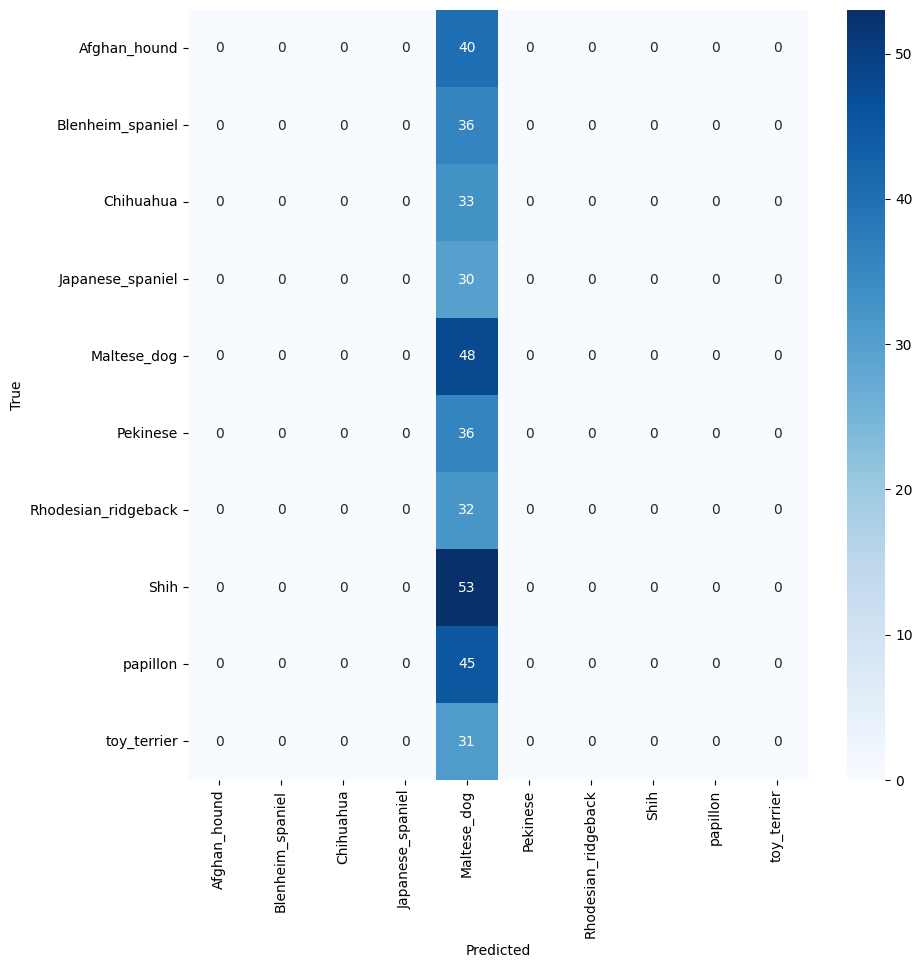

In [ ]:
print_perf(model_vgg)

In [60]:
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten
from keras.layers import Add, Activation, BatchNormalization
from keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def residual_module(layer_in, n_filters):
    merge_input = layer_in
    if layer_in.shape[-1] != n_filters:
        merge_input = Conv2D(n_filters, (1,1), padding='same', activation='relu')(layer_in)
        merge_input = BatchNormalization()(merge_input)

    conv1 = Conv2D(n_filters, (3,3), padding='same', activation='relu')(layer_in)
    conv1 = BatchNormalization()(conv1)
    
    conv2 = Conv2D(n_filters, (3,3), padding='same', activation='linear')(conv1)
    conv2 = BatchNormalization()(conv2)

    layer_out = Add()([conv2, merge_input])
    layer_out = Activation('relu')(layer_out)

    return layer_out


# définir la forme de l'entrée du modèle
input_shape = Input(shape=(224, 224, 3))

# Ajouter des modules résiduels
layer = residual_module(input_shape, 64)
layer = residual_module(layer, 64)
layer = residual_module(layer, 64)

# ajouter des couches de pooling et de classification
layer = MaxPooling2D((2,2))(layer)
layer = Flatten()(layer)
output_layer = Dense(num_classes, activation='softmax')(layer)

# Construire le modèle
model_resnet = Model(inputs=input_shape, outputs=output_layer)

# Compiler le modèle
model_resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
"""# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraînement du modèle
history_resnet = model_resnet.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs
)"""

"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraînement du modèle\nhistory_resnet = model_resnet.fit(\n    train_datagen,\n    validation_data=val_datagen,\n    steps_per_epoch=len(X_train) // batch_size,\n    validation_steps=len(X_test) // batch_size,\n    epochs=epochs\n)"

In [ ]:
"""import pickle

# Enregistrer l'objet history
with open('models/history_resnet.pkl', 'wb') as f:
      pickle.dump(history_resnet, f)"""

"import pickle\n\n# Enregistrer l'objet history\nwith open('models/history_resnet.pkl', 'wb') as f:\n      pickle.dump(history_resnet, f)"

In [28]:
import pickle

# Charger l'objet history
history_resnet = pickle.load(open('models/history_resnet.pkl', 'rb'))


In [61]:
# Évaluation du modèle
score = model_resnet.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.317277669906616
Test accuracy: 0.1041666641831398


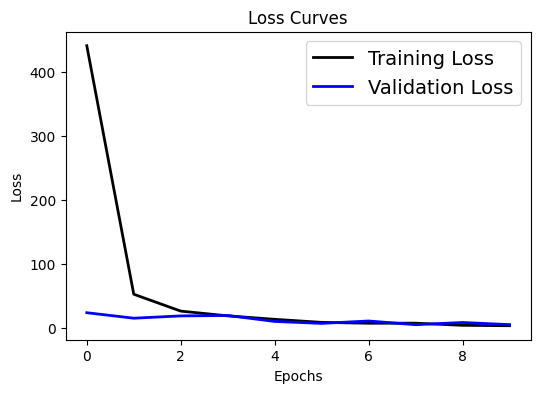

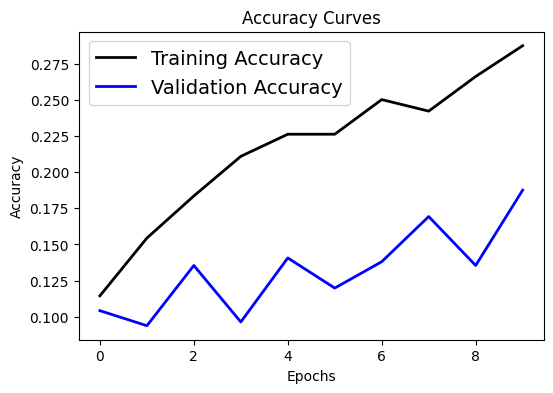

In [30]:
plot_loss_accuracy(history_resnet)

12/12 [==============================] - 19s 2s/step
                     precision    recall  f1-score   support

       Afghan_hound       0.24      0.10      0.14        40
   Blenheim_spaniel       0.14      0.03      0.05        36
          Chihuahua       0.00      0.00      0.00        33
   Japanese_spaniel       0.10      0.33      0.15        30
        Maltese_dog       0.00      0.00      0.00        48
           Pekinese       0.08      0.03      0.04        36
Rhodesian_ridgeback       0.08      0.50      0.14        32
               Shih       0.25      0.02      0.04        53
           papillon       0.00      0.00      0.00        45
        toy_terrier       0.15      0.23      0.18        31

           accuracy                           0.10       384
          macro avg       0.10      0.12      0.07       384
       weighted avg       0.11      0.10      0.07       384



/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


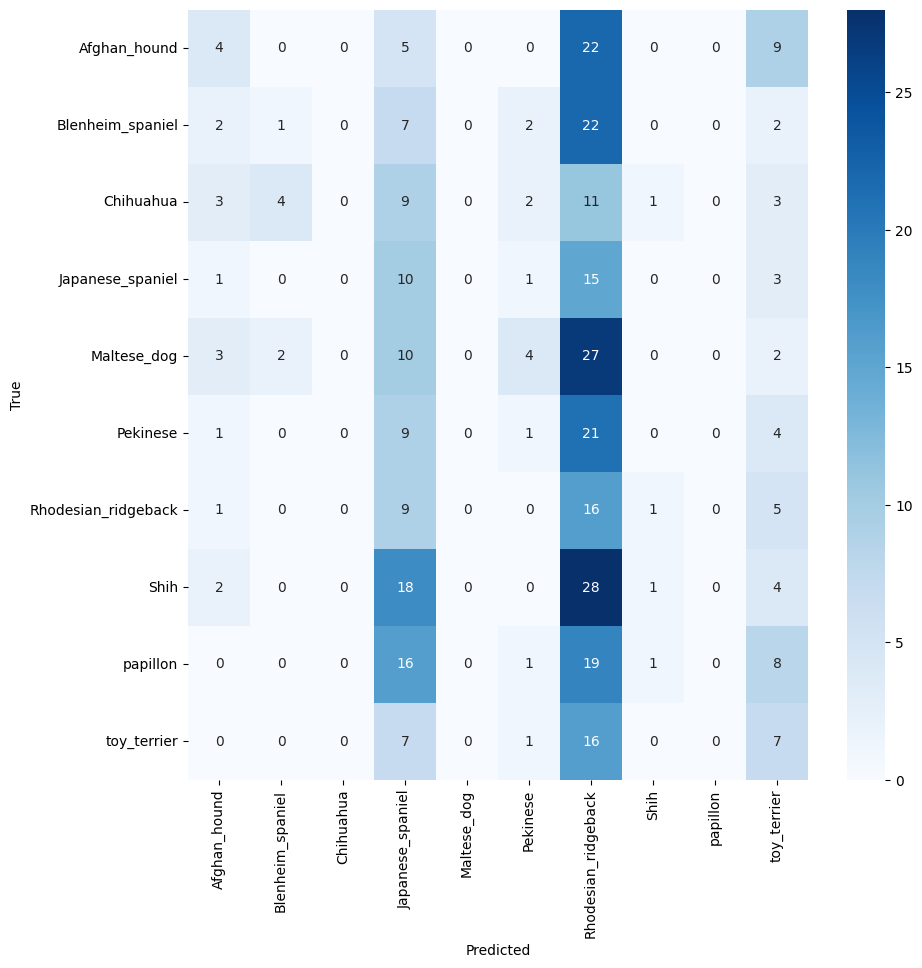

In [62]:
print_perf(model_resnet)

In [37]:
from keras.applications import VGG16
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Charger VGG16 sans la dernière couche (include_top=False)
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter une nouvelle couche de global pooling 2D pour réduire la dimension spatiale de la sortie du modèle de base
x = GlobalAveragePooling2D()(base_model.output)

# Ajouter une nouvelle couche dense de sortie avec le nombre de classes comme nombre de neurones
output_layer = Dense(num_classes, activation='softmax')(x)

# Définir le nouveau modèle
model_vgg16 = Model(inputs=base_model.input, outputs=output_layer)

# Figer les couches du modèle de base pour ne pas les entraîner
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model_vgg16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [32]:
"""# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraîner le modèle
history_vgg16 = model_vgg16.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs
)"""

"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraîner le modèle\nhistory_vgg16 = model_vgg16.fit(\n    train_datagen,\n    validation_data=val_datagen,\n    steps_per_epoch=len(X_train) // batch_size,\n    validation_steps=len(X_test) // batch_size,\n    epochs=epochs\n)"

In [33]:
"""import pickle

# Enregistrer l'objet history
with open('models/history_vgg_transfert.pkl', 'wb') as f:
      pickle.dump(history_vgg16, f)"""

"import pickle\n\n# Enregistrer l'objet history\nwith open('models/history_vgg_transfert.pkl', 'wb') as f:\n      pickle.dump(history_vgg16, f)"

In [38]:
import pickle

# Charger l'objet history
history_vgg16 = pickle.load(open('models/history_vgg_transfert.pkl', 'rb'))

In [63]:
model_vgg16.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

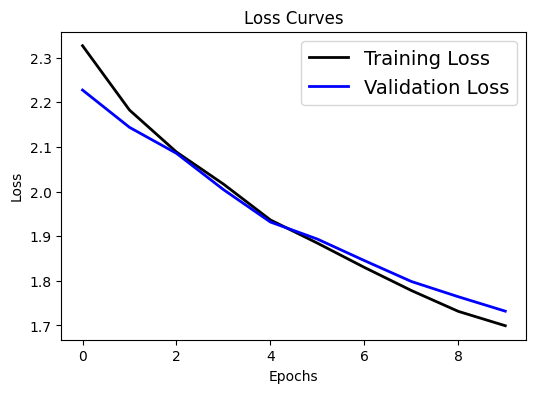

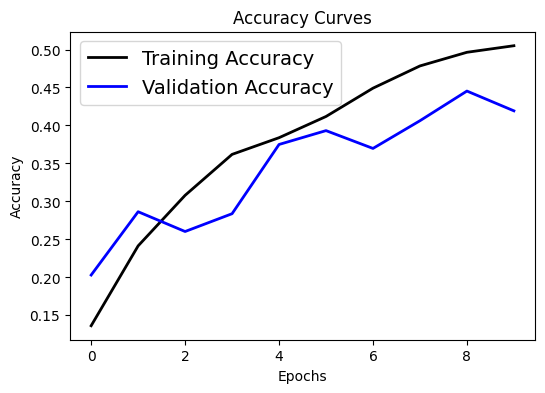

In [39]:
plot_loss_accuracy(history_vgg16)

12/12 [==============================] - 20s 2s/step
                     precision    recall  f1-score   support

       Afghan_hound       0.00      0.00      0.00        40
   Blenheim_spaniel       0.00      0.00      0.00        36
          Chihuahua       0.00      0.00      0.00        33
   Japanese_spaniel       0.05      0.10      0.07        30
        Maltese_dog       0.00      0.00      0.00        48
           Pekinese       0.00      0.00      0.00        36
Rhodesian_ridgeback       0.08      0.81      0.15        32
               Shih       0.00      0.00      0.00        53
           papillon       0.00      0.00      0.00        45
        toy_terrier       0.00      0.00      0.00        31

           accuracy                           0.08       384
          macro avg       0.01      0.09      0.02       384
       weighted avg       0.01      0.08      0.02       384



/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


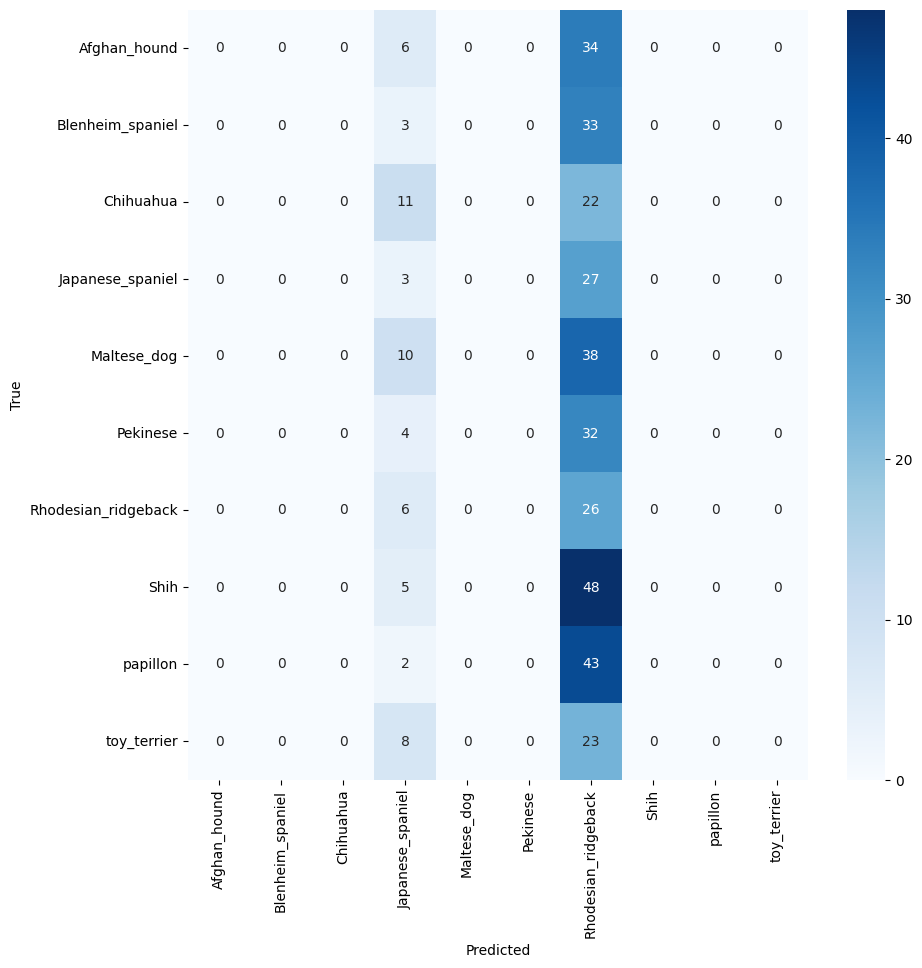

In [40]:
print_perf(model_vgg16)

In [41]:
score = model_vgg16.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.6307523250579834
Test accuracy: 0.0755208358168602


In [42]:
from keras.applications import InceptionV3
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D

# Charger le modèle InceptionV3, pré-entraîné sur ImageNet 
base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Ajouter un classificateur global average pooling layer et un classificateur entièrement connecté
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Créer le nouveau modèle
model_inception = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle de base pour qu'elles ne soient pas entraînées
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model_inception.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
"""# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraîner le modèle
history_inception = model_inception.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs
)"""

"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraîner le modèle\nhistory_inception = model_inception.fit(\n    train_datagen,\n    validation_data=val_datagen,\n    steps_per_epoch=len(X_train) // batch_size,\n    validation_steps=len(X_test) // batch_size,\n    epochs=epochs\n)"

In [44]:
"""import pickle

# Enregistrer l'objet history
with open('models/history_inception.pkl', 'wb') as f:
      pickle.dump(history_inception, f)"""

"import pickle\n\n# Enregistrer l'objet history\nwith open('models/history_inception.pkl', 'wb') as f:\n      pickle.dump(history_inception, f)"

In [45]:
import pickle

# Charger l'objet history
history_inception = pickle.load(open('models/history_inception.pkl', 'rb'))

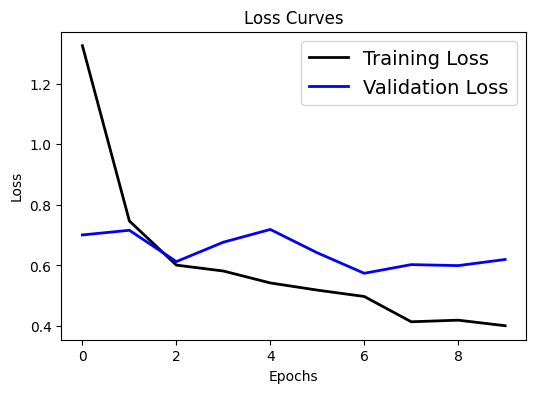

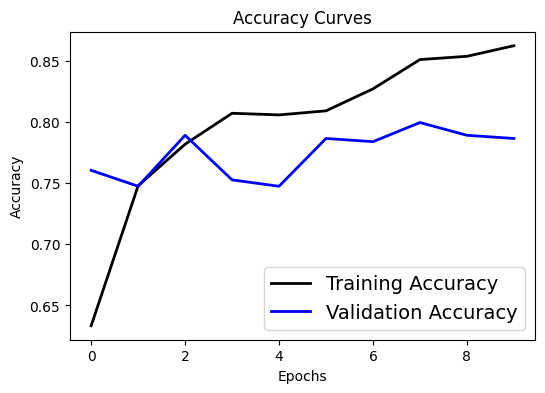

In [46]:
plot_loss_accuracy(history_inception)

12/12 [==============================] - 4s 255ms/step
                     precision    recall  f1-score   support

       Afghan_hound       0.00      0.00      0.00        40
   Blenheim_spaniel       0.00      0.00      0.00        36
          Chihuahua       0.00      0.00      0.00        33
   Japanese_spaniel       0.02      0.07      0.03        30
        Maltese_dog       0.00      0.00      0.00        48
           Pekinese       0.00      0.00      0.00        36
Rhodesian_ridgeback       0.11      0.59      0.19        32
               Shih       0.00      0.00      0.00        53
           papillon       0.18      0.36      0.24        45
        toy_terrier       0.08      0.03      0.05        31

           accuracy                           0.10       384
          macro avg       0.04      0.10      0.05       384
       weighted avg       0.04      0.10      0.05       384



/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


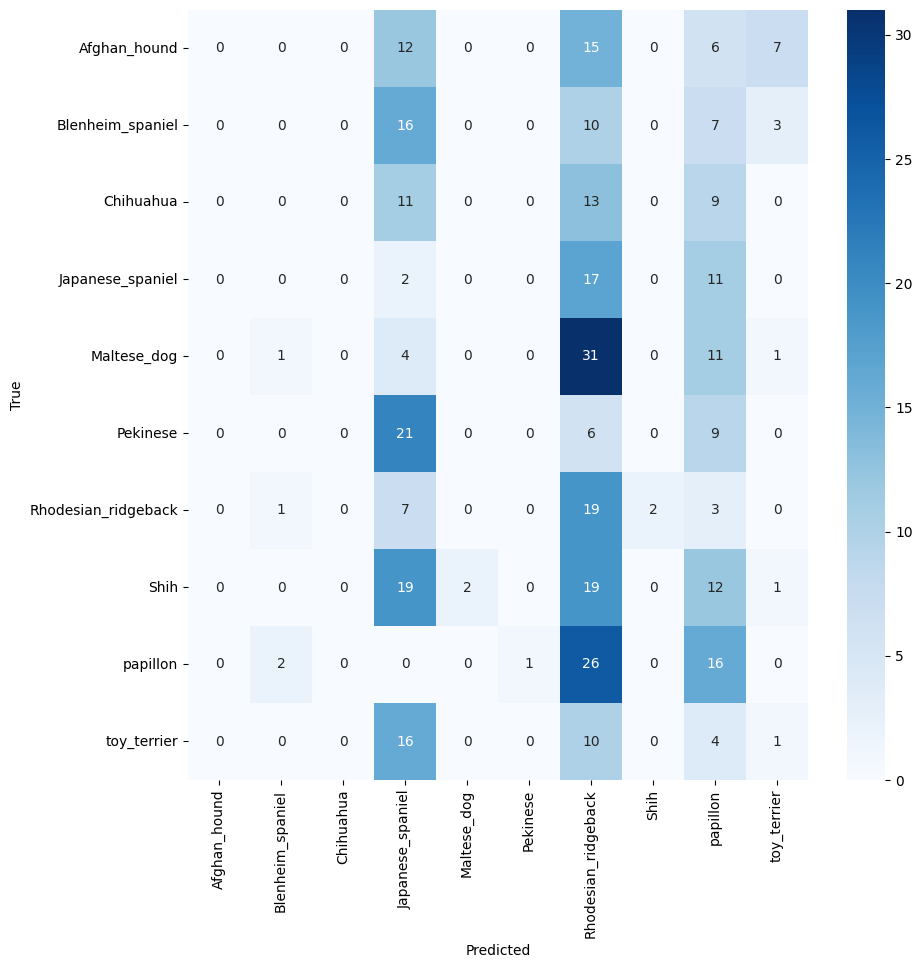

In [47]:
print_perf(model_inception)

In [48]:
score = model_inception.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 2.664752721786499
Test accuracy: 0.0989583358168602


In [49]:
from keras.applications import InceptionV3
from keras.layers import Dense, GlobalAveragePooling2D
from keras.models import Model
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping

# Charger le modèle InceptionV3 pré-entraîné
base_model = InceptionV3(weights='imagenet', include_top=False)

# Ajouter une nouvelle couche de pooling global en moyenne
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Ajouter une nouvelle couche entièrement connectée pour la prédiction.
# Ajouter la régularisation l2 à la couche dense
x = Dense(1024, activation='relu', kernel_regularizer=l2(0.01))(x)

# Définir la couche de sortie pour prédire num_classes classes
predictions = Dense(num_classes, activation='softmax')(x)

# Construire le modèle final à entraîner
model_inception_earlystop = Model(inputs=base_model.input, outputs=predictions)

# Geler les couches du modèle de base pour qu'elles ne soient pas entraînées
for layer in base_model.layers:
    layer.trainable = False

# Compiler le modèle
model_inception_earlystop.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Définir un callback d'arrêt précoce pour arrêter l'entraînement lorsque la validation_loss ne diminue plus
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

In [50]:
"""# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraîner le modèle en utilisant le générateur avec early stop
history_inception_earlystop = model_inception_earlystop.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)"""

"# Définir les paramètres d'entraînement\nepochs = 10\nbatch_size = 32\n\n# Entraîner le modèle en utilisant le générateur avec early stop\nhistory_inception_earlystop = model_inception_earlystop.fit(\n    train_datagen,\n    validation_data=val_datagen,\n    steps_per_epoch=len(X_train) // batch_size,\n    validation_steps=len(X_test) // batch_size,\n    epochs=epochs,\n    callbacks=[early_stopping]\n)"

In [51]:
"""import pickle
  
# Enregistrer l'objet history
with open('models/history_inception_earlystop.pkl', 'wb') as f:
      pickle.dump(history_inception_earlystop, f)"""

"import pickle\n  \n# Enregistrer l'objet history\nwith open('models/history_inception_earlystop.pkl', 'wb') as f:\n      pickle.dump(history_inception_earlystop, f)"

In [52]:
import pickle

# Charger l'objet history
history_inception_earlystop = pickle.load(open('models/history_inception_earlystop.pkl', 'rb'))

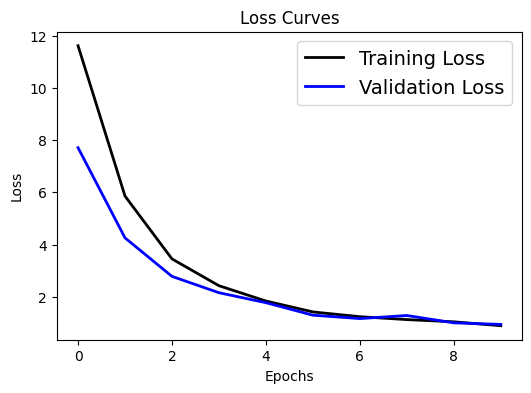

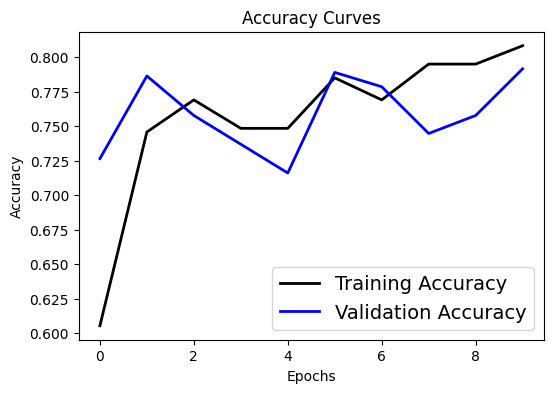

In [53]:
plot_loss_accuracy(history_inception_earlystop)

12/12 [==============================] - 4s 255ms/step
                     precision    recall  f1-score   support

       Afghan_hound       0.06      0.10      0.08        40
   Blenheim_spaniel       0.16      0.19      0.18        36
          Chihuahua       0.00      0.00      0.00        33
   Japanese_spaniel       0.00      0.00      0.00        30
        Maltese_dog       0.00      0.00      0.00        48
           Pekinese       0.08      0.53      0.14        36
Rhodesian_ridgeback       0.00      0.00      0.00        32
               Shih       0.25      0.04      0.07        53
           papillon       0.06      0.02      0.03        45
        toy_terrier       0.20      0.03      0.06        31

           accuracy                           0.09       384
          macro avg       0.08      0.09      0.05       384
       weighted avg       0.09      0.09      0.05       384



/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/lolonois/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


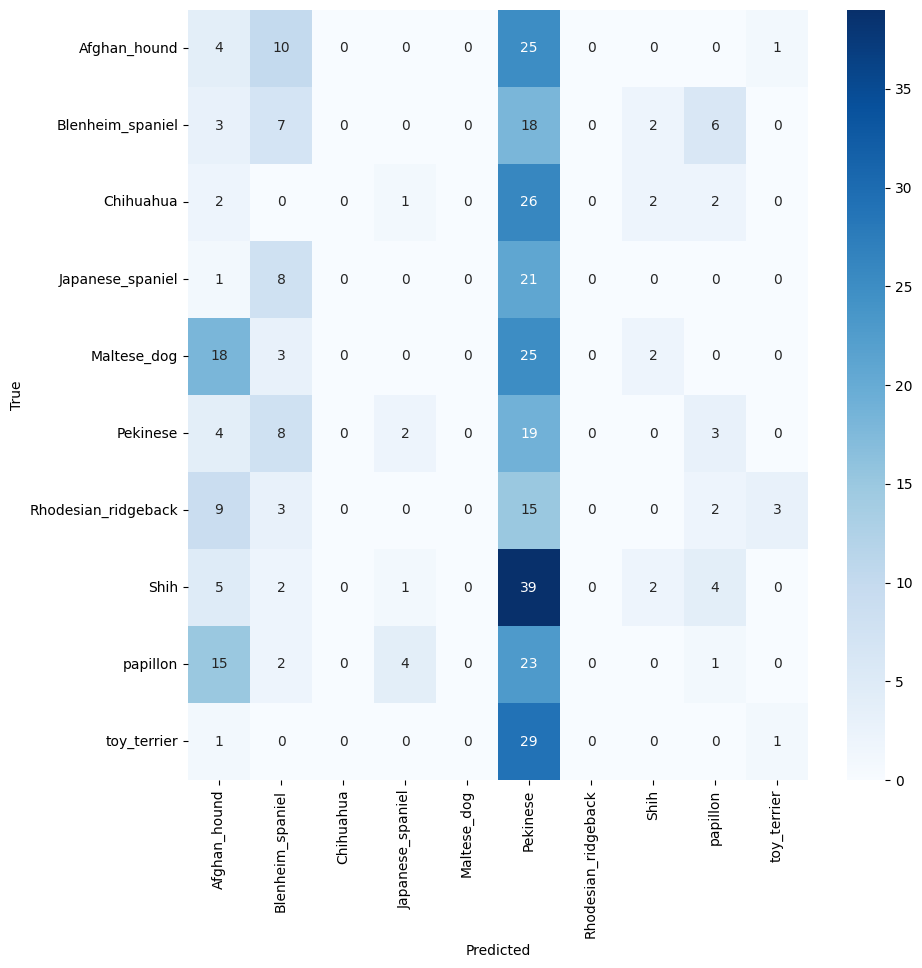

In [54]:
print_perf(model_inception_earlystop)

In [55]:
score = model_inception_earlystop.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 16.354536056518555
Test accuracy: 0.0885416641831398


In [57]:
# Définir les paramètres d'entraînement
epochs = 10
batch_size = 32

# Entraîner le modèle en utilisant le générateur avec early stop
history_inception_earlystop = model_inception_earlystop.fit(
    train_datagen,
    validation_data=val_datagen,
    steps_per_epoch=len(X_train) // batch_size,
    validation_steps=len(X_test) // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)

Epoch 1/10


2023-06-02 08:13:54.999321: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - ETA: 0s - loss: 11.7139 - accuracy: 0.5842

2023-06-02 08:14:09.109811: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


47/47 [==============================] - 18s 343ms/step - loss: 11.7139 - accuracy: 0.5842 - val_loss: 7.7659 - val_accuracy: 0.7266
Epoch 2/10
47/47 [==============================] - 16s 334ms/step - loss: 5.7745 - accuracy: 0.7598 - val_loss: 4.1719 - val_accuracy: 0.8047
Epoch 3/10
47/47 [==============================] - 16s 338ms/step - loss: 3.4768 - accuracy: 0.7598 - val_loss: 2.7567 - val_accuracy: 0.7656
Epoch 4/10
47/47 [==============================] - 16s 337ms/step - loss: 2.4388 - accuracy: 0.7458 - val_loss: 1.9829 - val_accuracy: 0.7839
Epoch 5/10
47/47 [==============================] - 16s 330ms/step - loss: 1.7629 - accuracy: 0.7798 - val_loss: 1.5841 - val_accuracy: 0.7656
Epoch 6/10
47/47 [==============================] - 16s 333ms/step - loss: 1.4072 - accuracy: 0.7784 - val_loss: 1.3319 - val_accuracy: 0.7656
Epoch 7/10
47/47 [==============================] - 16s 340ms/step - loss: 1.2658 - accuracy: 0.7884 - val_loss: 1.3309 - val_accuracy: 0.7448
Epoch 8/1

In [58]:
score = model_inception_earlystop.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.9114735722541809
Test accuracy: 0.7838541865348816


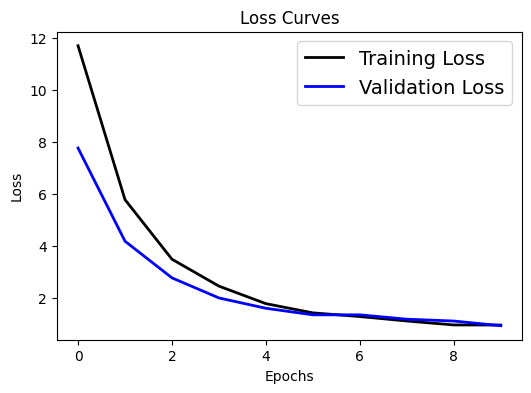

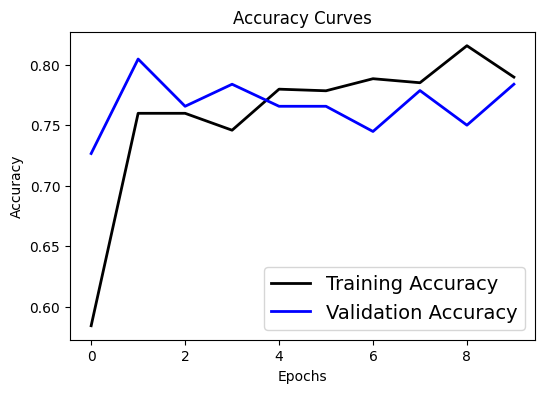

In [64]:
plot_loss_accuracy(history_inception_earlystop)

12/12 [==============================] - 3s 266ms/step
                     precision    recall  f1-score   support

       Afghan_hound       0.92      0.90      0.91        40
   Blenheim_spaniel       0.69      0.81      0.74        36
          Chihuahua       0.61      0.58      0.59        33
   Japanese_spaniel       0.79      0.77      0.78        30
        Maltese_dog       0.93      0.79      0.85        48
           Pekinese       0.76      0.81      0.78        36
Rhodesian_ridgeback       0.96      0.69      0.80        32
               Shih       0.68      0.74      0.71        53
           papillon       1.00      0.82      0.90        45
        toy_terrier       0.62      0.94      0.74        31

           accuracy                           0.78       384
          macro avg       0.80      0.78      0.78       384
       weighted avg       0.80      0.78      0.79       384



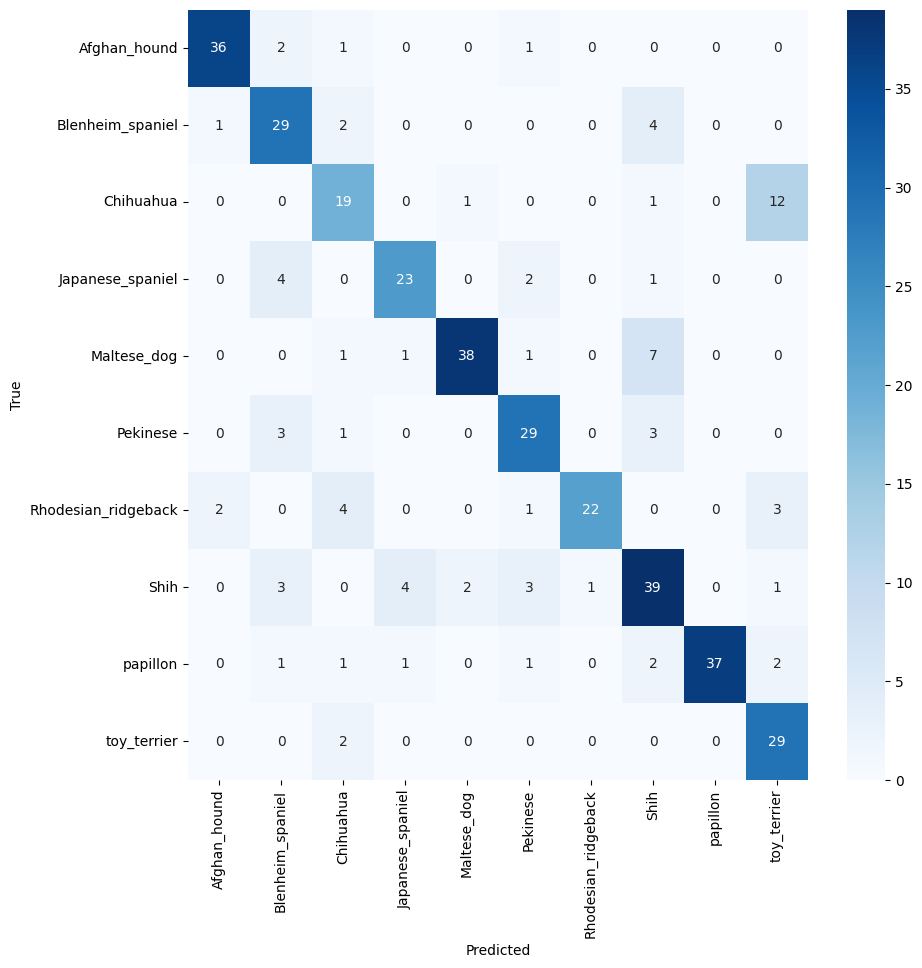

In [65]:
print_perf(model_inception_earlystop)